<a href="https://colab.research.google.com/github/hillykhan/Power-Bi-Sales-Dasboard/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for better visuals
sns.set_style("whitegrid")


In [47]:
#Basic Data Exploration (EDA Start)

df = sns.load_dataset('titanic')
df.head()
df.shape
df.columns
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [48]:
#Convert Data Types
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 68.7+ KB


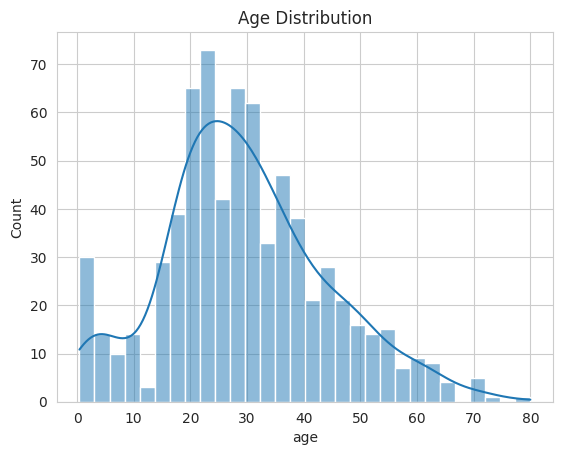

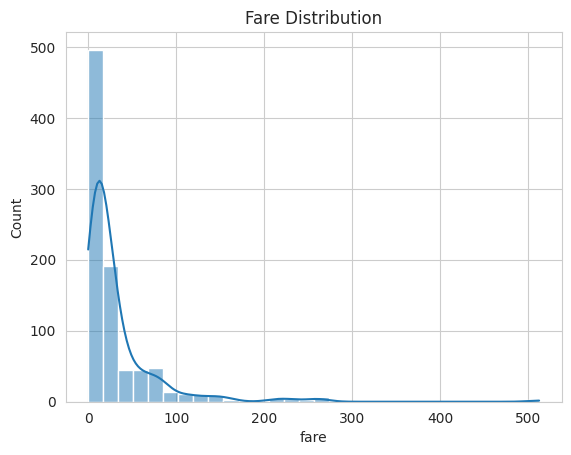

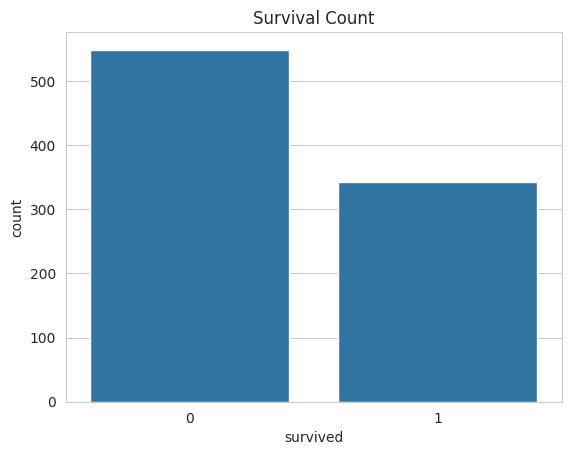

In [49]:
#Age Distribution

sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#Fare Distribution
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

#Survival Count
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


/tmp/ipython-input-156516175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['survived'].mean()


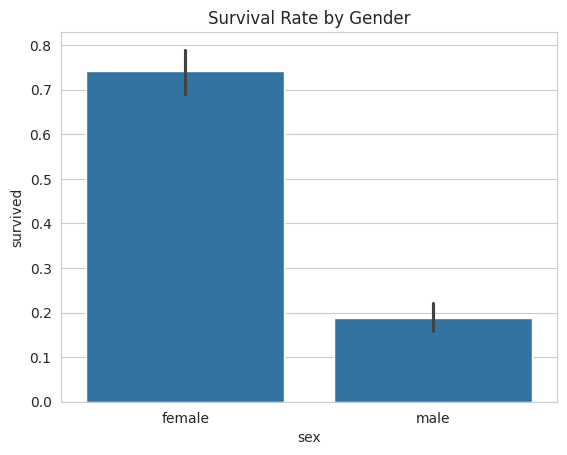

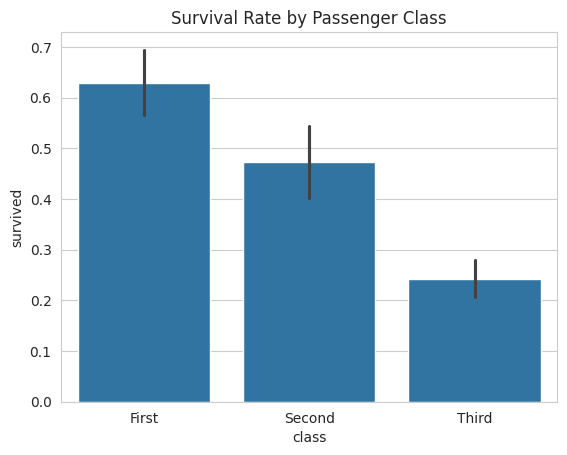

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
#Survival by Gender
df.groupby('class')['survived'].mean()
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()
#Survival Rate by Passenger Class
sns.barplot(x='class', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()
pd.crosstab(df['class'], df['sex'], values=df['survived'], aggfunc='mean')



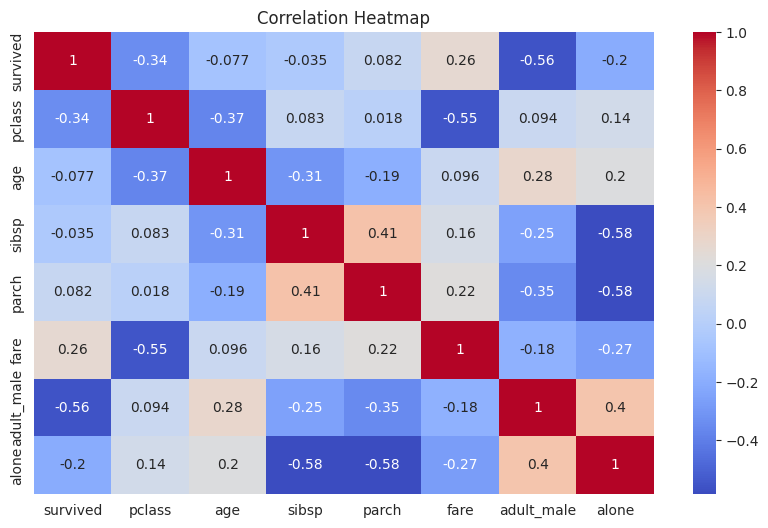

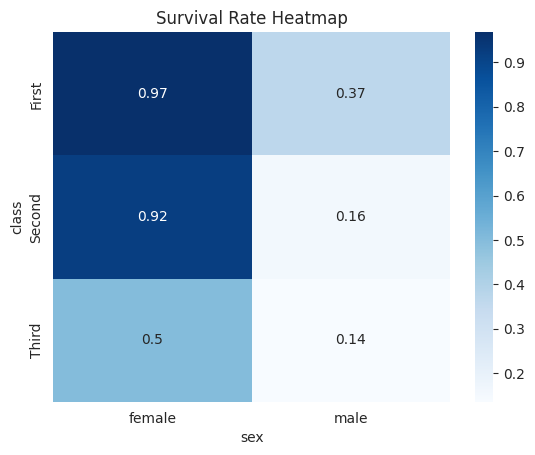

In [51]:
#BONUS: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#BONUS: Survival Heatmap (Class vs Gender)
survival_table = pd.crosstab(df['class'], df['sex'], values=df['survived'], aggfunc='mean')

sns.heatmap(survival_table, annot=True, cmap='Blues')
plt.title("Survival Rate Heatmap")
plt.show()

